# Call center data modeling

You are advising a client on the number of call center agents they need to handle their customer support load. We start by modeling the number of phone calls we expect to come into the call center during each hour of the day.

You are provided with a data set of the intervals between phone calls arriving during one day. Each value is a time in minutes indicating the amount of time that passed between receiving two consecutive phone calls.

## Loading the data

In [8]:
import numpy as np
import scipy as sp
import scipy.stats as sts
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
# Load the data set containing durations between calls arriving at the call
# center during 1 day. All values are in minutes.
waiting_times_day = np.loadtxt('2.2_data.csv')

# Display some basic information about the data set.
print('Size of data set:', len(waiting_times_day))
print('First 3 values in data set:', waiting_times_day[:3])
print('Sum of data set:', sum(waiting_times_day))

Size of data set: 5856
First 3 values in data set: [30.   3.4  3.2]
Sum of data set: 1441.6838153800093


Since the values are intervals between calls measured in minutes, this means

* we assume the first call happened at 00:00 (midnight),
* the second call happened at about 00:30 (30 minutes after midnight),
* the third call happened at about 00:33 (30 + 3.4 minutes),
* the fourth call happened at about 00:37, etc.

When we sum the values, we get about 1440 minutes (1 day).

You are told that the number of calls arriving varies quite a lot, depending on which hour of the day it is. The smallest number of calls usually occur around 3am or 4am. Most calls usually come in between 11am and 1pm.

## Data pre-processing
Since we expect different call rates during different hours, we split the data set into 24 separate series — one for each hour of the day.

In [10]:
# Make 24 empty lists, one per hour.
waiting_times_per_hour = [[] for _ in range(24)]

# Split the data into 24 separate series, one for each hour of the day.
current_time = 0
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

for hour, calls_in_hour in enumerate(waiting_times_per_hour):
    print(f'{hour:02}:00-{hour + 1:02}:00 - {len(calls_in_hour)} calls')

00:00-01:00 - 5 calls
01:00-02:00 - 4 calls
02:00-03:00 - 6 calls
03:00-04:00 - 8 calls
04:00-05:00 - 26 calls
05:00-06:00 - 53 calls
06:00-07:00 - 93 calls
07:00-08:00 - 173 calls
08:00-09:00 - 254 calls
09:00-10:00 - 345 calls
10:00-11:00 - 496 calls
11:00-12:00 - 924 calls
12:00-13:00 - 858 calls
13:00-14:00 - 382 calls
14:00-15:00 - 185 calls
15:00-16:00 - 207 calls
16:00-17:00 - 263 calls
17:00-18:00 - 419 calls
18:00-19:00 - 531 calls
19:00-20:00 - 400 calls
20:00-21:00 - 137 calls
21:00-22:00 - 51 calls
22:00-23:00 - 20 calls
23:00-24:00 - 16 calls


## Task 1: Plot the number of calls per hour
Use Matplotlib to visualize the number of calls that arrive during each hour of the day, stored in the variable `waiting_times_per_hour`. The call numbers are shown in the output above. You should find an appropriate way to visualize it.

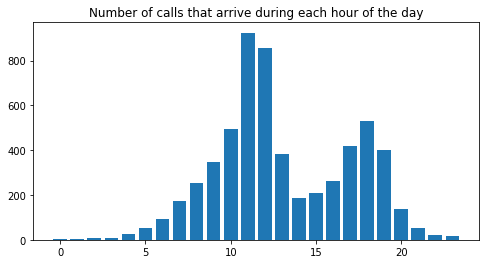

In [27]:
num_calls = []
for i in waiting_times_per_hour:
    # get the number of calls for each hour
    num_calls.append(len(i))
plt.figure(None, figsize=(8,4))
plt.bar(range(24), num_calls)
plt.title('Number of calls that arrive during each hour of the day')
plt.show()

## Task 2: Plot a histogram of the durations for one hour
Take the data for the 9th hour (so between 9am and 10am) and plot a histogram showing the distribution over waiting times between calls during that hour.

## Task 3: Guess the distribution
What type of distribution best represents the data in your histogram?

* Identify a type of distribution. **In class you will use this distribution as your likelihood function in a Bayesian inference problem.**
* Guess what the parameters of the distribution are. (This is just a guess for now. In class we will infer the values of the parameters.)
* Plot the pdf of your best guess on top of your histogram, to see if they match.
* **Important:** You have to normalize your histogram so that it will have the same vertical scale as the plot of the pdf. You can normalize a histogram by using the argument `density=True` in the `hist` function.

In [38]:
# plt.figure(None, (8, 4))
# for each in waiting_times_per_hour:
#     # exponential - the time we need to wait before an event (calls) happen
#     # graph histogram for the 9th hour
#     plt.hist(each, density = True)
#     # graph exponential distribution
# #     x = np.linspace(0, 1.5, 300)
# #     plt.plot(x, sts.expon.pdf(x, 0, 0.2))
# plt.show()


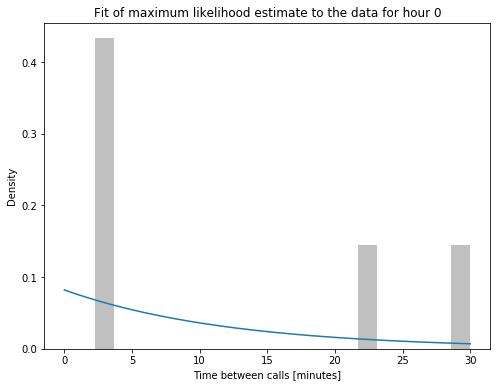

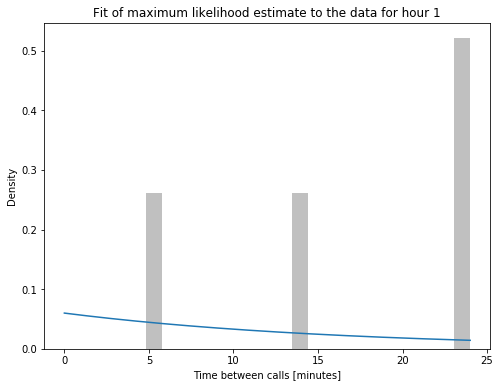

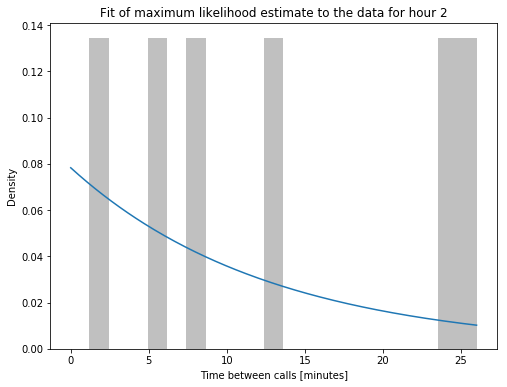

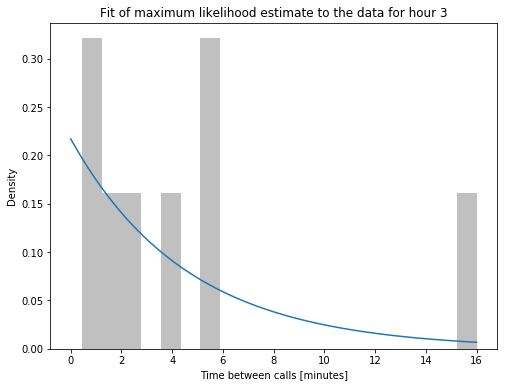

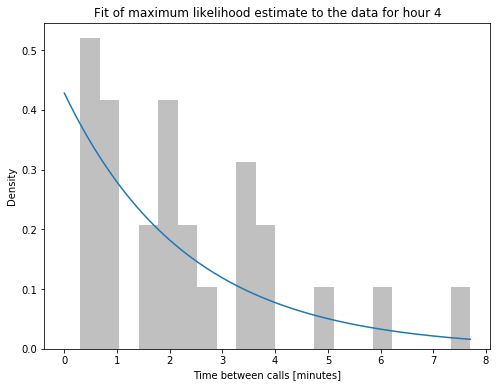

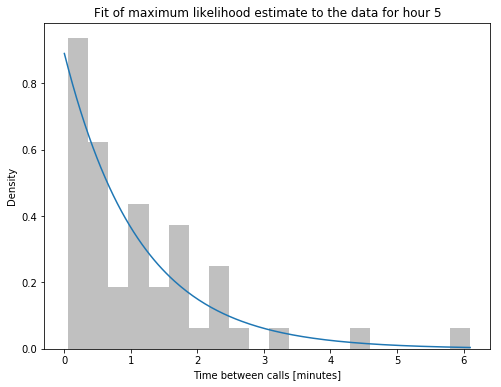

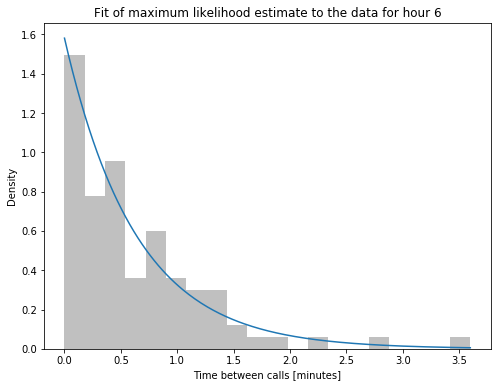

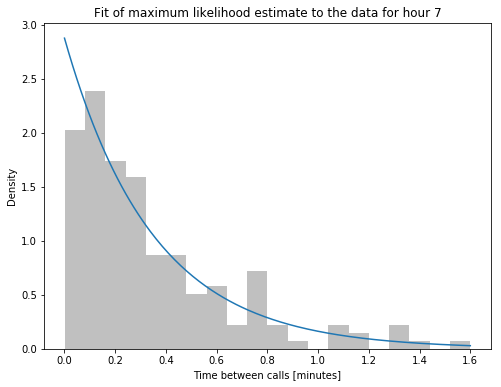

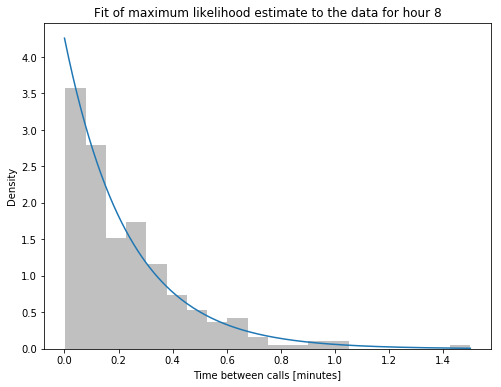

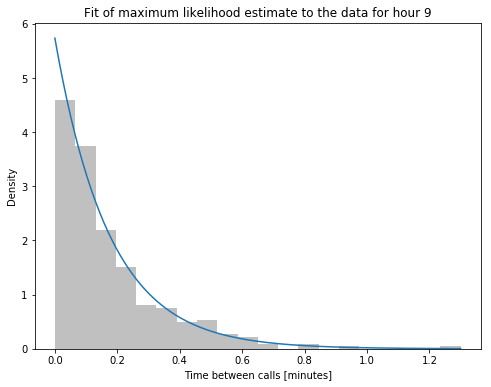

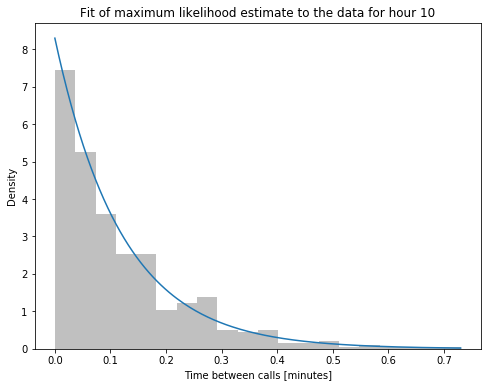

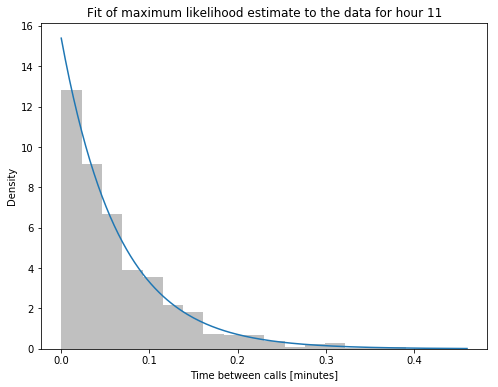

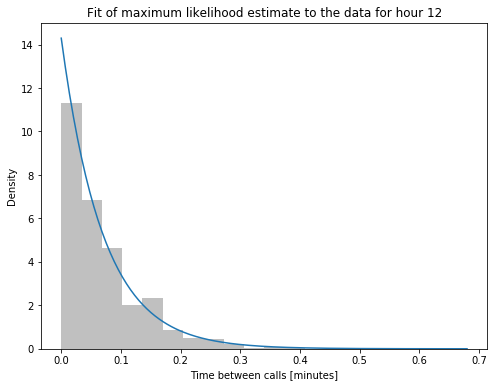

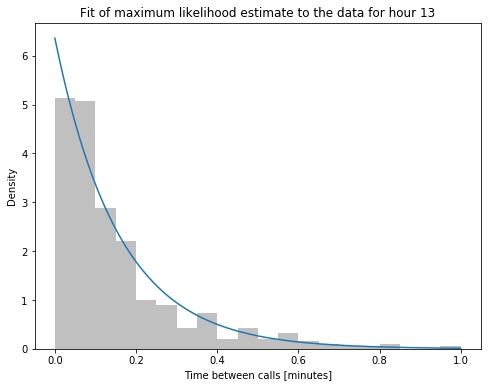

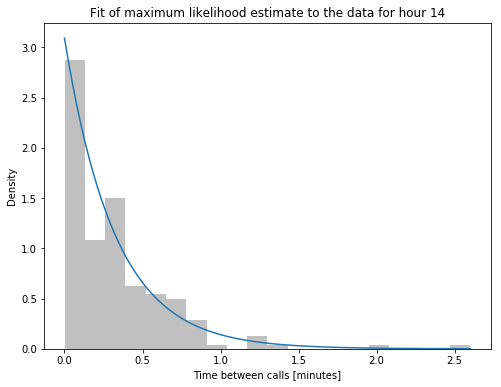

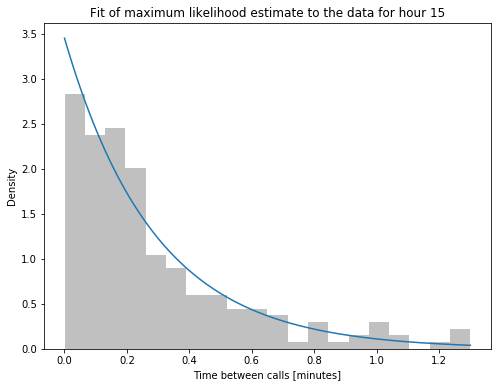

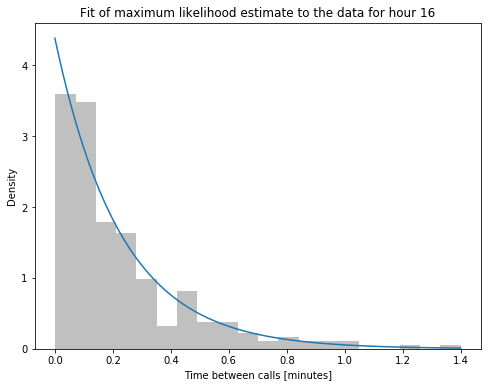

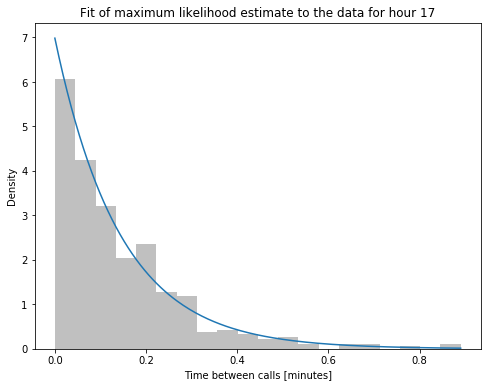

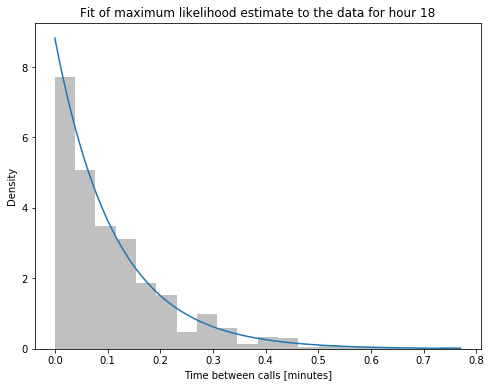

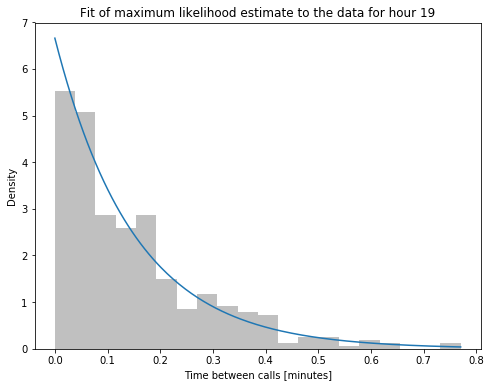

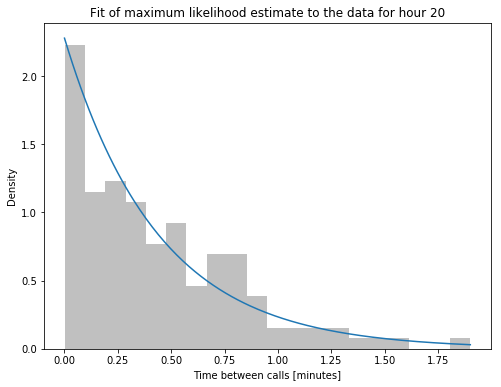

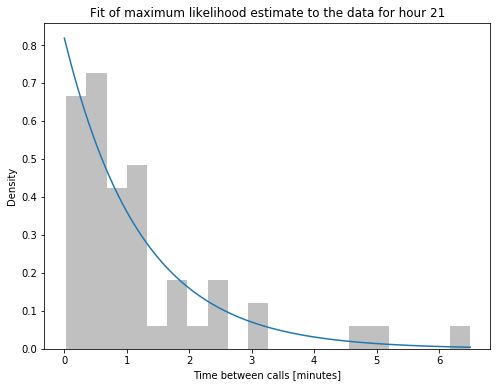

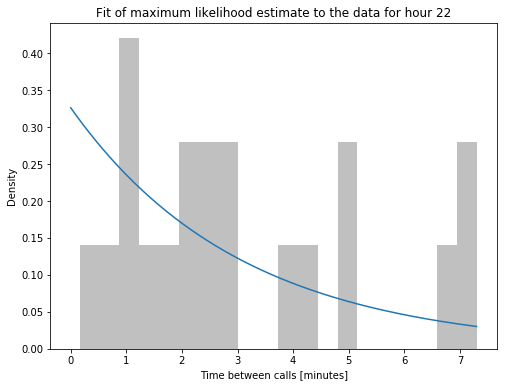

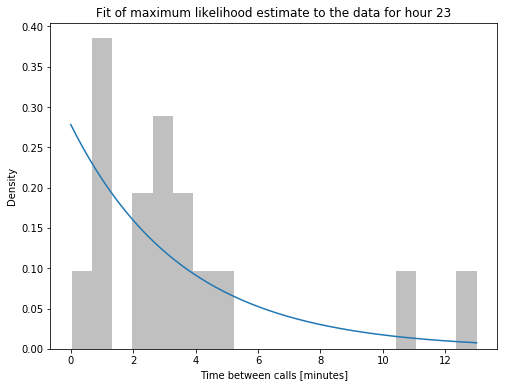

In [39]:
# Exponential distribution with maximum likelihood fit to the data
for hour_index in range(24):
    waiting_times_hour = waiting_times_per_hour[hour_index]
    lambda_ = 1 / np.mean(waiting_times_hour)
    distribution = sts.expon(scale=1/lambda_)
    plt.figure(figsize=(8, 6))
    plt.hist(waiting_times_hour, bins=20, density=True, color='#c0c0c0')
    x = np.linspace(0, max(waiting_times_hour), 200)
    y = distribution.pdf(x)
    plt.plot(x, y)
    plt.xlabel('Time between calls [minutes]')
    plt.ylabel('Density')
    plt.title(f'Fit of maximum likelihood estimate to the data for hour {hour_index}')
    plt.show()

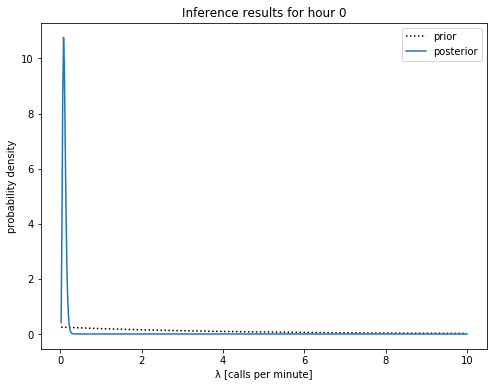

0.08 [0.02, 0.2]


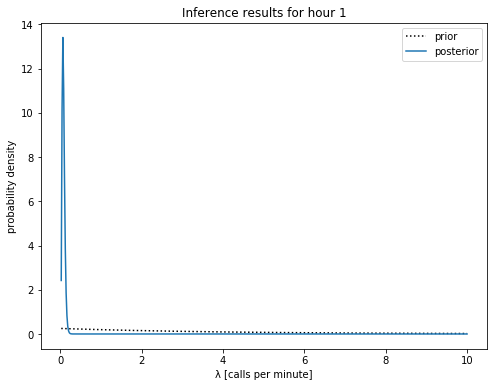

0.06 [0.02, 0.16]


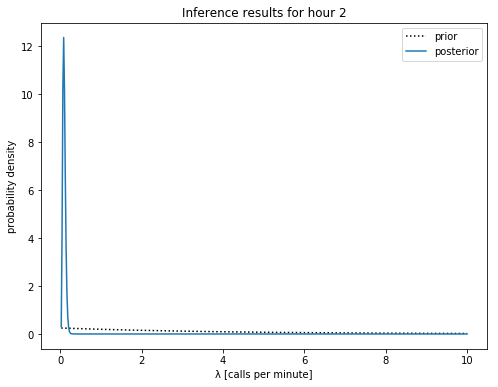

0.08 [0.02, 0.18]


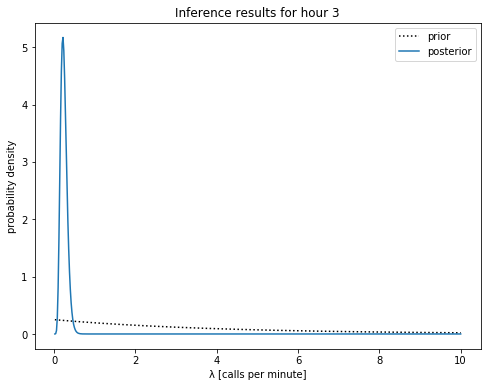

0.22 [0.08, 0.46]


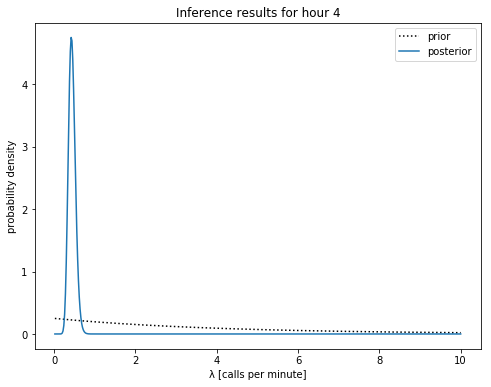

0.42 [0.26, 0.66]


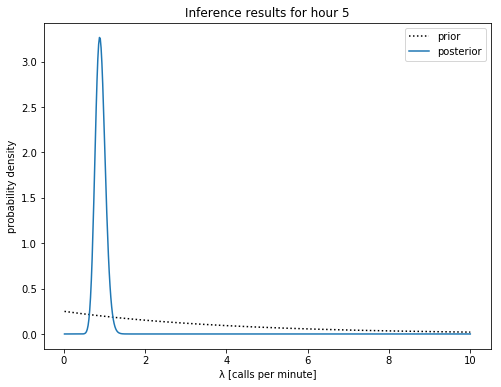

0.88 [0.64, 1.2]


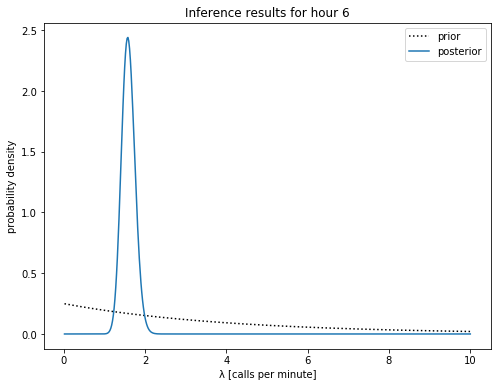

1.58 [1.22, 1.98]


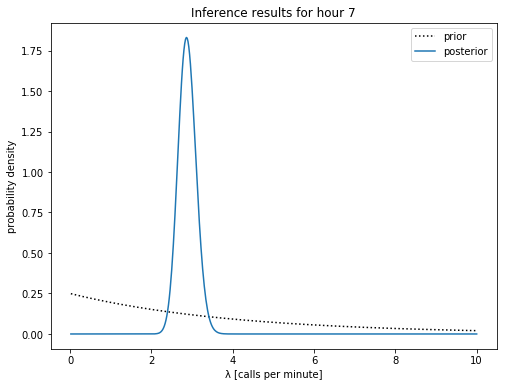

2.86 [2.38, 3.4]


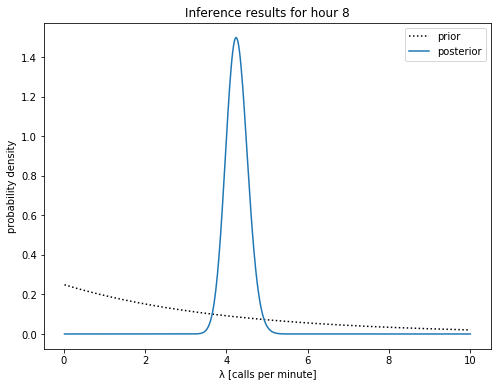

4.24 [3.66, 4.9]


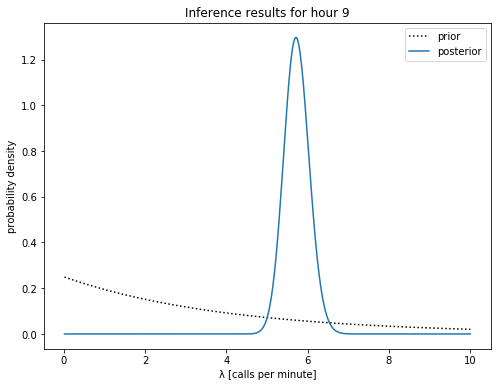

5.72 [5.0200000000000005, 6.46]


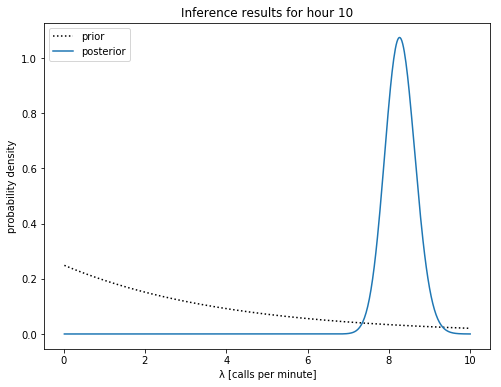

8.26 [7.42, 9.16]


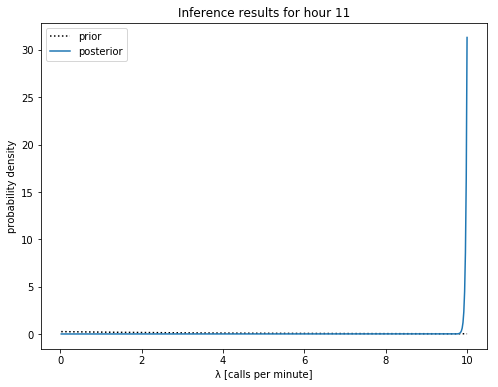

9.96 [9.86, 9.98]


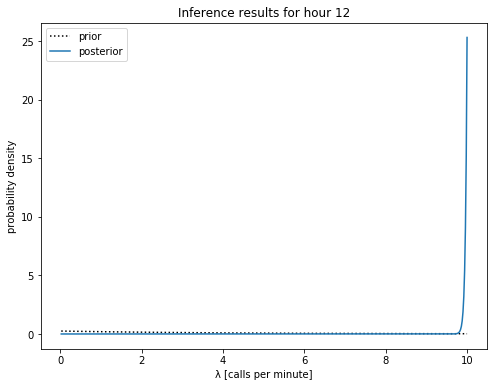

9.96 [9.82, 9.98]


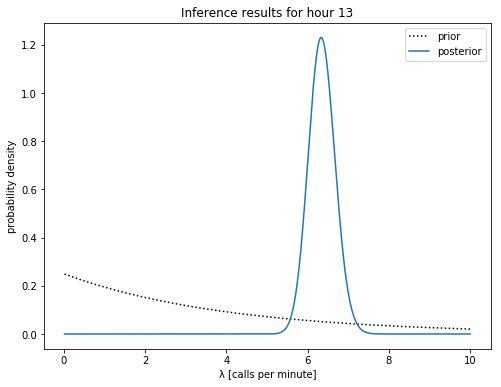

6.34 [5.6000000000000005, 7.12]


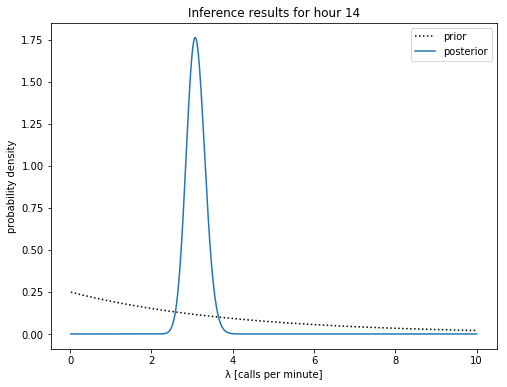

3.08 [2.58, 3.64]


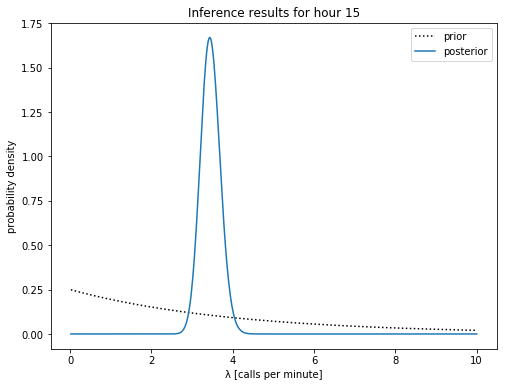

3.44 [2.9, 4.0200000000000005]


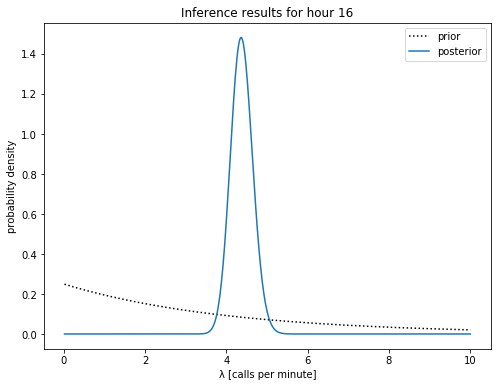

4.36 [3.7600000000000002, 5.0200000000000005]


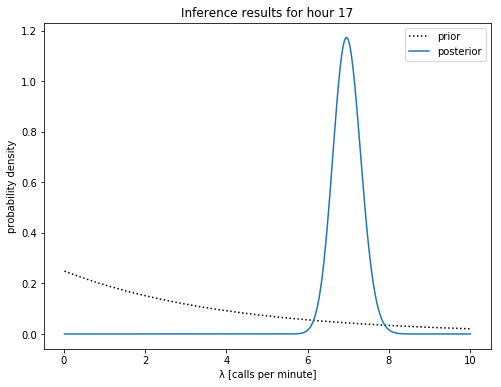

6.96 [6.2, 7.78]


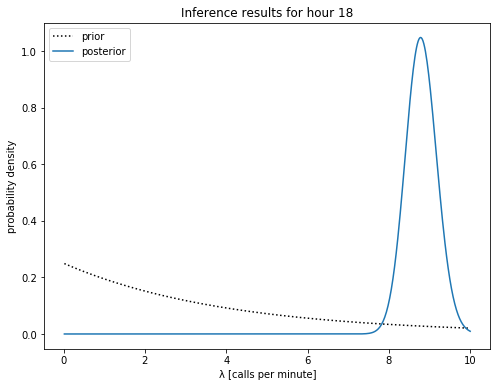

8.78 [7.92, 9.68]


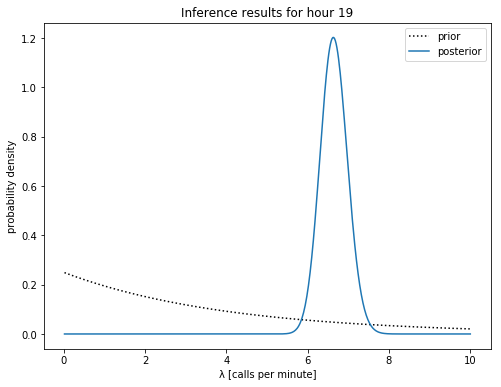

6.640000000000001 [5.88, 7.44]


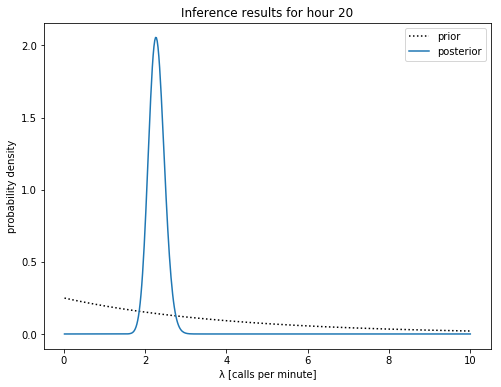

2.2600000000000002 [1.84, 2.7600000000000002]


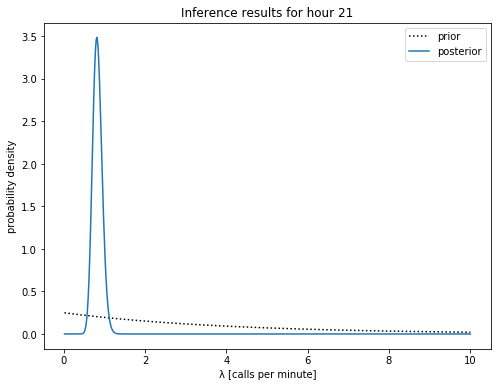

0.8200000000000001 [0.58, 1.12]


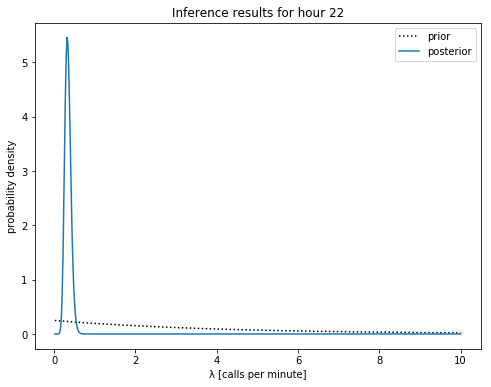

0.32 [0.18, 0.52]


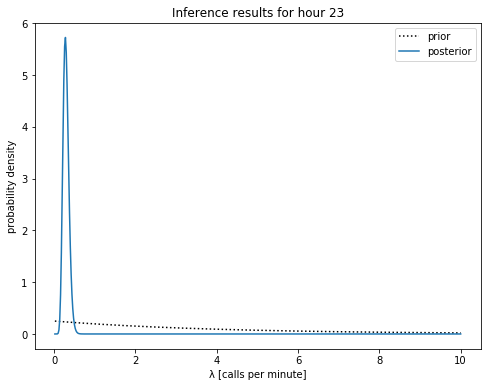

0.28 [0.14, 0.48]


In [43]:
# THE LIKELIHOOD FUNCTION
#
# This function takes 2 inputs, namely the parameter (λ) value at which to
# compute the likelihood and a value from the data set. You need to evaluate
# the exponential distribution of the datum given the parameter value.

def likelihood(lambda_, datum):
    return sts.expon(scale=1/lambda_).pdf(datum)

# THE PRIOR DISTRIBUTION
#
# This function takes 1 input, namely the parameter value (λ) at which to
# compute the prior probability density. You need to evaluate the distribution
# Gamma(λ | α, β).

def prior(lambda_):
    return sts.gamma(1, scale=1/0.25).pdf(lambda_)

# THE POSTERIOR DISTRIBUTION
#
# The function below is provided to help make computing the posterior easier. It
# follows the same pattern as in the previous class, where we multiple the prior
# and the likelihood evaluated at various values of the parameter (λ).
#
# You will see the function uses the logarithms of various distributions. This
# is for numerical reasons. When you multiply lots of likelihood values, the
# result can become very large or very small, causing numerical overflow or
# underflow in Python. Taking logarithms avoids this problem.

def compute_posterior(parameter_values, data):
    log_prior = np.log(prior(parameter_values))
    log_likelihood = np.array([
        np.sum(np.log(likelihood(param, data)))
        for param in parameter_values])
    unnormalized_log_posterior = log_prior + log_likelihood
    unnormalized_log_posterior -= max(unnormalized_log_posterior)
    unnormalized_posterior = np.exp(unnormalized_log_posterior)
    area = sp.integrate.trapz(unnormalized_posterior, parameter_values)
    posterior = unnormalized_posterior / area
    return posterior

def compute_percentile(parameter_values, distribution_values, percentile):
    '''
    Compute the parameter value at a particular percentile of the given
    probability distribution values. This function uses the cumulative trapezoid
    integrator in SciPy.

    Inputs:

        parameter_values (array of float) This is the list of parameter values
          at which the probability distribution has been evaluated.

        distribution_values (array of float) This is the list of values of the
          probability density function evaluated at the parameter values above.

        percentile (float) This is the value between 0 and 1 of the percentile
          to compute.

    Returns: (float) The parameter value at the given percentile.
    '''
    cumulative_distribution = sp.integrate.cumtrapz(
        distribution_values, parameter_values)
    percentile_index = np.searchsorted(cumulative_distribution, percentile)
    return lambdas[percentile_index]

lambdas = np.linspace(0, 10, 501)[1:]
mean_ls = []
CI_ls = []

for hour_index in range(24):
    waiting_times_hour = waiting_times_per_hour[hour_index]
    posterior = compute_posterior(lambdas, waiting_times_hour)
    # YOU NEED TO PLOT THE PRIOR AND POSTERIOR ON THE SAME AXES.
    plt.figure(figsize=(8, 6))
    plt.plot(lambdas, prior(lambdas), color='black', linestyle=':', label='prior')
    plt.plot(lambdas, posterior, label='posterior')
    plt.xlabel('λ [calls per minute]')
    plt.ylabel('probability density')
    plt.title(f'Inference results for hour {hour_index}')
    plt.legend()
    plt.show()
    percentiles = [compute_percentile(lambdas, posterior, p) for p in [0.01, 0.5, 0.99]]
    mean = percentiles[1]
    CI = [percentiles[0], percentiles[2]]
    mean_ls.append(mean)
    CI_ls.append(CI)
    print(mean, CI)

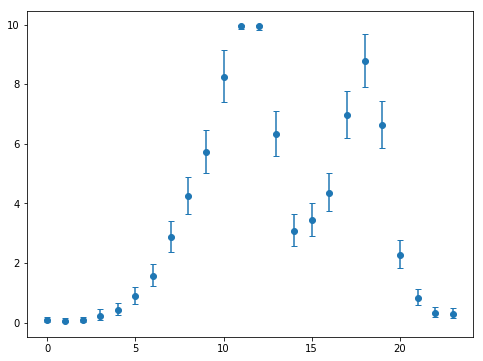

In [70]:
CI_ls2 = [[i[j] for i in CI_ls] for j in [0, 1]]
err_ls = [list(np.array(mean_ls)-np.array(CI_ls2[0])), list(np.array(CI_ls2[1])-np.array(mean_ls))]
# print(mean_ls, CI_ls2, err_ls)
plt.figure(figsize=(8, 6))
plt.scatter(range(24), mean_ls)
plt.errorbar(range(24), mean_ls, fmt='none', yerr = err_ls, capsize=3)
plt.show()